## Problem Statement:

You are provided with a data set and you want to predict who will or will not survive the Titanic Disaster


## Import Statements


In [50]:
import pandas as pd
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme("notebook")
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Reading the Data


In [2]:
titanic = pd.read_csv("titanic_train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Cleaning the Data


<Axes: >

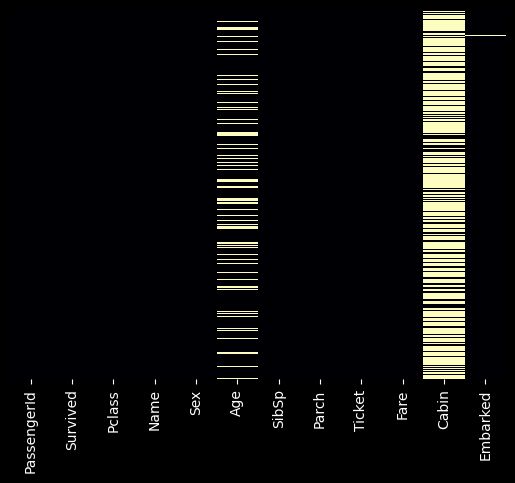

In [3]:
sns.heatmap(
    titanic.isnull(),
    yticklabels=False,
    cbar=False,
    cmap="magma",
)

In [4]:
fig = px.box(
    title="Relation of Age with Passenger Class",
    data_frame=titanic,
    x="Pclass",
    y="Age",
    color="Pclass",
)

fig.update_layout(
    xaxis_title="Passenger Classes",
    legend_title_text="Passenger Class",
)

fig.show()

#### Filling the Age Column with the Mean of Passenger based upon their passenger class


In [5]:
def impute_age(cols: list) -> int:
    """This function would return the age based upon the passenger boarding class i.e Pclass"""

    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 29
        else:
            return 24

    else:
        return Age

In [6]:
titanic["Age"] = titanic[["Age", "Pclass"]].apply(impute_age, axis=1)

C:\Users\MULTITECH\AppData\Local\Temp\ipykernel_4224\3707992956.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\MULTITECH\AppData\Local\Temp\ipykernel_4224\3707992956.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [7]:
titanic.dropna(inplace=True)

<Axes: >

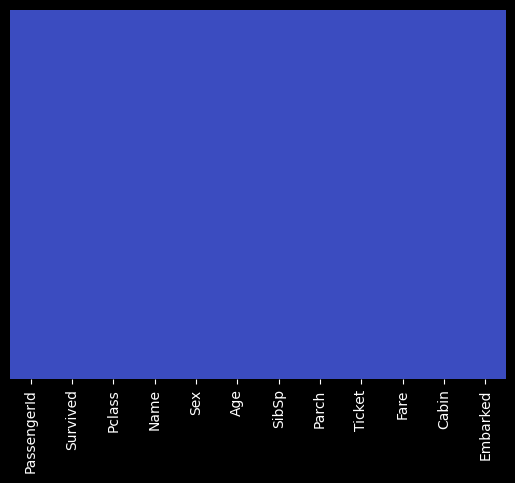

In [8]:
sns.heatmap(
    titanic.isnull(),
    yticklabels=False,
    cbar=False,
    cmap="coolwarm",
)

#### Droping the Cabin column because there are way to many NaN values


In [9]:
titanic.drop("Cabin", inplace=True, axis=1)

### Relation between the Survived and Age

#### Conclusion;

- Majority of the People are in the 25 - 35 age category


In [10]:
fig = px.histogram(
    x="Age",
    data_frame=titanic,
    nbins=30,
)

fig.update_layout(bargap=0.01)

fig.show()

### Relation b/w Survived and the Gender

#### Conclusion

- It seems like there majority of the people who survied are Female


In [11]:
titanic.head()

fig = px.histogram(
    data_frame=titanic,
    x="Survived",
    y="Sex",
    color="Sex",
    color_discrete_sequence=["dodgerblue", "crimson"],
)

fig.show()

### Relation of PassengerClass is Pclass and Survived

#### Conclusion:

- It seems like the majority of the people who didnot survive were from the Pclass == 3 meaning that they were from the the third passenger Class


In [12]:
fig = px.histogram(
    titanic,
    x="Survived",
    color="Pclass",
    barmode="group",
    title="Count of Survived by Passenger Class",
)

# Show the plot
fig.show()

### Relationship between the Spouse and Sibling Count

#### Conclusion:

- The majority of the people who didn't survive where singles


In [13]:
fig = px.histogram(
    data_frame=titanic,
    x="Survived",
    color="SibSp",
    barmode="group",
)

fig.show()

### Relation between the Fare Price and the Surivor Count

- It seems like the people who have paid higher fare price got much higher chances for there survival then others


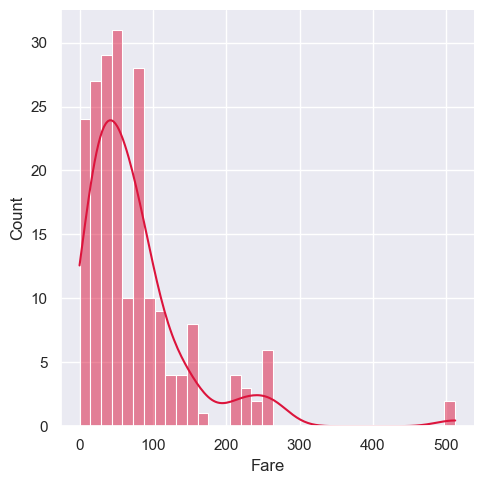

In [27]:
sns.displot(
    data=titanic,
    x="Fare",
    bins=35,
    color="crimson",
    kde=True,
)

### Converting the Sex and Emarked Column to Numeric Data


In [15]:
Sex = pd.get_dummies(
    titanic["Sex"],
    drop_first=True,
)

Embarked = pd.get_dummies(
    titanic["Embarked"],
    drop_first=True,
)

In [16]:
titanic = pd.concat(
    [titanic, Sex, Embarked],
    axis=1,
)

### Dropping the not needed columns


In [17]:
titanic.drop(["Embarked"], axis=1, inplace=True)

In [34]:
titanic.drop(["Name", "Sex", "Ticket"], axis=1, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,2,1,1,38.0,1,0,71.2833,False,False,False
3,4,1,1,35.0,1,0,53.1000,False,False,True
6,7,0,1,54.0,0,0,51.8625,True,False,True
10,11,1,3,4.0,1,1,16.7000,False,False,True
11,12,1,1,58.0,0,0,26.5500,False,False,True


### Training the Logistic Model


In [35]:
X = titanic.drop("Survived", axis=1)
y = titanic["Survived"]

In [36]:
X_Train, x_test, Y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=101,
)

In [37]:
print(X_Train.shape)
print(x_test.shape)
print(Y_train.shape)
print(y_test.shape)

(141, 9)
(61, 9)
(141,)
(61,)


In [62]:
log_model = LogisticRegression(C=10, max_iter=10000, penalty="l1", solver="liblinear")

In [63]:
log_model.fit(X_Train, Y_train)

LogisticRegression(C=10, max_iter=10000, penalty='l1', solver='liblinear')

In [64]:
predictions = log_model.predict(x_test)

### Classification Report


In [65]:
def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Purples):

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("UnNormalized Confusion Matrix")
    print(cm)

    plt.title("Confusion Matrix")
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    threshold = cm.max() / 2.0
    labels = [
        ["TP", "FP"],
        ["FN", "TN"],
    ]

    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            f"{format(cm[i,j],fmt)}\n{labels[i][j]}",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
        )

    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.tight_layout()
    plt.grid(False)
    plt.show()

UnNormalized Confusion Matrix
[[36  5]
 [ 6 14]]


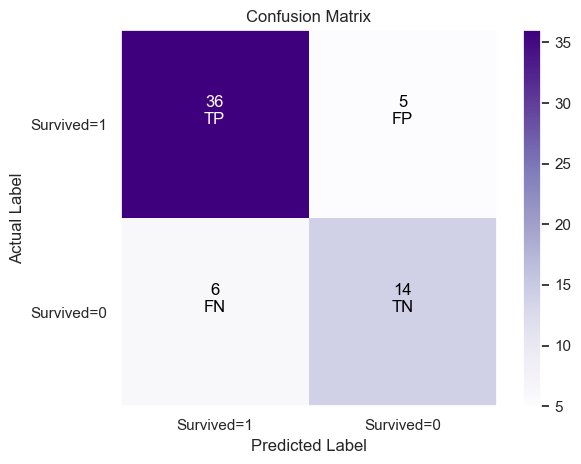

In [66]:
plot_confusion_matrix(
    cm=confusion_matrix(y_test, predictions, labels=[1, 0]),
    classes=["Survived=1", "Survived=0"],
)

In [67]:
accuracy_score(y_test, predictions) * 100

81.9672131147541

In [57]:
param_grid = [
    {
        "penalty": ["l2"],
        "solver": ["newton-cg", "lbfgs", "sag"],
        "C": [0.01, 0.1, 1, 10],
    },
    {"penalty": ["l1"], "solver": ["liblinear"], "C": [0.01, 0.1, 1, 10]},
    {
        "penalty": ["elasticnet"],
        "solver": ["saga"],
        "C": [0.01, 0.1, 1, 10],
        "l1_ratio": [0.1, 0.5, 0.9],
    },
    {"penalty": ["l2"], "solver": ["saga"], "C": [0.01, 0.1, 1, 10]},
]

grid_search = GridSearchCV(
    estimator=log_model, param_grid=param_grid, verbose=10, cv=2, n_jobs=-1
)

grid_search.fit(X_Train, Y_train)

Fitting 2 folds for each of 32 candidates, totalling 64 fits


GridSearchCV(cv=2, estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs', 'sag']},
                         {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1'],
                          'solver': ['liblinear']},
                         {'C': [0.01, 0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9],
                          'penalty': ['elasticnet'], 'solver': ['saga']},
                         {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'],
                          'solver': ['saga']}],
             verbose=10)

In [59]:
print(grid_search.best_estimator_)

LogisticRegression(C=10, max_iter=10000, penalty='l1', solver='liblinear')


In [60]:
grid_search.predict(x_test)

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [61]:
accuracy_score(y_test, grid_search.predict(x_test))

0.819672131147541